<p>
  <center><img src="../assets/thakaa_logo.png" width="500" height="300"></center>
</p>

<p>
<br>
  <center><img src="../assets/artwork.png" width="600" height="300"></center>
</p>
<br>
<h1 style='text-align: center;'> سلسلة معسكرات ذكاء: المعسكر الثاني | استكشاف وتحليل البيانات وأساسيات تعلم الآلة </h1>
<!-- <font size="+2" style='text-align: center;'> تعلّم كيف تكتشف البيانات وتطوّر نماذج تعلّم الآلة </h2> -->
<div style="text-align: center; font-family: Arial; font-size: 2em;">تعلّم كيف تكتشف البيانات وتطوّر نماذج تعلّم الآلة</div>

<h2 style="text-align: left;"> 📚 استيراد المكتبات</h2>

الشيء الأول اللي حنسويه هو إننا نجيب المكتبات اللي حنحتاجها في هذا النوتبوك 

هذه هي المكتبات اللي حنحتاجها في مرحلة اكتشاف البيانات

* __numpy__: The number one library for scientific computing in python
* __pandas__: Allows us to work with structured data effectively
* __matplotlib__: 2D plotting library
* __seaborn__: Statistical data visualization based on matplotlib

In [1]:
import sys

sys.path.append('../')

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from processing import *

<h2 style="text-align: left;">🚗 تحميل البيانات</h2>

Our dataset is stored in a comma separated file (CSV-file), and in order to work efficiently with the data we use the Pandas library we imported as pd above. Pandas is a data tool for Python, where data is represented by a DataFrame: a table of structured data similar to an Excel-sheet. You can think of a DataFrame as both a SQL table and a spreadsheet where you have columns with column names and rows with indexes.

We will use Pandas a lot during this lab since it is a good and very popular tool for structured data. We have made an effort to explain every function/method or attribute you need, but you are still encouraged to use the documentation provided by Pandas if needed:

https://pandas.pydata.org/pandas-docs/stable/index.html# (or ask us!)

Another recommended resource for learning some Pandas is "Kaggle Learn" and their Pandas module (www.kaggle.com)

In [3]:
# Load the dataset from the CSV-file into a Pandas dataframe and assign it to a new variable called "df"
df = read_saudi_arabia_used_cars_dataset()
df.head()

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
0,Chrysler,2018,Black,Full,Gas,103000,114000,C300
1,Nissan,2019,Silver,Standard,gas,72418,27500,Sunny
2,Hyundai,2019,Grey,Standard,gas,114154,43000,Elantra
3,Hyundai,2019,Silver,Semi Full,Gas,41912,59500,Elantra
4,Honda,2018,Navy,Full,Gas,39000,72000,Accord


In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Make       5652 non-null   object
 1   Year       5652 non-null   int64 
 2   Color      5652 non-null   object
 3   Options    5611 non-null   object
 4   Fuel_Type  5652 non-null   object
 5   Mileage    5652 non-null   int64 
 6   Price      5652 non-null   int64 
 7   Type       5652 non-null   object
dtypes: int64(3), object(5)
memory usage: 1.8 MB


<h2 style="text-align: left;"> 👀 ألقِ نظرة أولى على البيانات</h2>

In [5]:
# Your code goes here
df.head(10)

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
0,Chrysler,2018,Black,Full,Gas,103000,114000,C300
1,Nissan,2019,Silver,Standard,gas,72418,27500,Sunny
2,Hyundai,2019,Grey,Standard,gas,114154,43000,Elantra
3,Hyundai,2019,Silver,Semi Full,Gas,41912,59500,Elantra
4,Honda,2018,Navy,Full,Gas,39000,72000,Accord
5,Toyota,2011,White,Semi Full,Gas,183000,92000,Land Cruiser
6,Chevrolet,2019,Black,Standard,Gas,70000,80000,Impala
7,Toyota,2018,White,Standard,Gas,131000,32000,Yaris
8,Toyota,2017,White,Standard,gas,107000,50000,Camry
9,Nissan,2014,White,Full,gas,106000,135000,Patrol


You can also display the end of the `DataFrame` by using the method `tail`. 
​
```python
<name of dataframe>.tail(n=7)   
```

<h3 style="text-align: left;"><b>تمرين:</b> اطبع آخر ثمانية صفوف من بيانات السيارات المستعملة 📝</h3>

In [6]:
df['Make'].value_counts().head(20)

Toyota        1287
Hyundai        730
Ford           525
Chevrolet      441
Nissan         364
Kia            270
Mercedes       268
GMC            254
Lexus          238
Mazda          145
Honda          142
Mitsubishi      98
BMW             93
Dodge           88
Land Rover      77
Jeep            57
Chrysler        48
Genesis         46
Cadillac        40
Audi            39
Name: Make, dtype: int64

In [7]:
# Your code goes here
df.tail(8)

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
5644,Mitsubishi,2009,Grey,Standard,Gas,222835,11500,Lancer
5645,Ford,2013,Black,Standard,Gas,277000,30000,Edge
5646,Kia,2012,Black,Standard,Gas,147000,25000,Cadenza
5647,Kia,2006,Navy,Full,Gas,257000,15000,Sorento
5648,Audi,2015,Silver,Full,Gas,77000,75000,A6
5649,Chevrolet,2010,Silver,Full,gas,150000,53000,Camaro
5650,Nissan,2011,Silver,Full,gas,18500,22000,Altima
5651,Cadillac,2013,White,Full,Gas,256000,40000,Other


Now that you have looked at the dataset you probably have a good understanding of each feature/column.   
But to make sure that we have a common understanding we list the columns and their measurement unit. 

* Make: الماركة
* Type: النوع
* Year: الموديل
* Origin: الوارد
* Color: اللون الخارجي
* Options: Full or standard
* Engine_Size: حجم المحرك باللتر
* Fuel_type: نوع الوقود
* Gear_Type: نوع القير
* Mileage: الممشى بالكيلومتر
* Region: المنطقة
* Price: السعر بالريال السعودي
* Negotiable: إذا كانت على السوم أو لا


<h3 style="text-align: left;"> 🧮 اعرض بعض الإحصاءات والخصائص للبيانات</h3>

In [8]:
# round(2) decide how many decimals are printed. 
# Feel free to remove round(2)
df.describe().round(2)

,Year,Mileage,Price
count,5652.00,5652.00,5652.00
mean,2014.79,140108.21,78536.59
std,5.22,334045.08,76073.74
min,1963.00,100.00,0.00
25%,2013.00,46484.50,35000.00
50%,2016.00,101000.00,58000.00
75%,2018.00,181000.00,95000.00
max,2021.00,20000000.00,1150000.00


<h3 style="text-align: left;"><b>سؤال :</b> بناء على هذا الملخص الإحصائي أعلاه، هل تستطيع الإجابة على هذه الأسئلة ❓</h3>

<div style="text-align: left;">تقريبًا، كم عدد السيارات المُستعملة في البيانات موديلها هو سنة ٢٠١٨ أو أكثر؟  -</div>
<div style="text-align: left;">لو كان عندك ٦٠٠٠٠ ريال، كم عدد السيارات المناسبة لميزانيتك؟  -</div>
<div style="text-align: left;">تقريبًا كم عدد السيارات التي مشت أقل من ٥٠ ألف كيلومتر؟  -</div>

<h3 style="text-align: left;"><b>اكتب إجاباتك في هذه الخلية</b></h3>

<div style="text-align: left;">:إجابة السؤال الأول -</div>
{اكتب هنا}
<br>
٢١٣٧ سيارة
<div style="text-align: left;">:إجابة السؤال الثاني -</div>
{اكتب هنا}
<br>
٣٨٦٤ سيارة
<div style="text-align: left;">:إجابة السؤال الثالث -</div>
{اكتب هنا}
<br>
٤٥٩١ سيارة
<div style="text-align: left;"></div>

<h2 style="text-align: left;"> 🧹 تنظيف البيانات</h2>

When working with data it is important to know how each feature (column) is represented. 
To display the type of each feature we use the `DataFrame` attribute `dtypes`:

```python
<name of dataframe>.dtypes
```

<h3 style="text-align: left;"><b>تمرين:</b> اطبع أنواع كل الأعمدة في البيانات 📝</h3>

In [9]:
### Your code goes here
df.dtypes

Make         object
Year          int64
Color        object
Options      object
Fuel_Type    object
Mileage       int64
Price         int64
Type         object
dtype: object

From this we see that all features except FuelType are numeric and represented by integers or floats.   
We will start by looking at the feature FuelType.

*PS: In the following we will use the variable name `dataframe` in the examples. Replace this with the name of your dataframe as in the above when you work with the exercises.*

<h3 style="text-align: left;"> ⛽ نظّف عمود نوع الوقود</h3>

To access a column in the dataframe you simply use:

```python
dataframe['ColumnName']
```
or
```python
dataframe.ColumnName
```

This gives you a Pandas object called a `Series`, which is a datatype used for single-column `DataFrame`-types. You can index a `Series` like you would index a list or an array in Python:


```python
dataframe['ColumnName'][start:stop:step]
```
or
```python
dataframe.ColumnName[start:stop:step]
```

<h3 style="text-align: left;"><b>تمرين:</b> اطبع عمود نوع الوقود، ثم حاول أن تحصل على أجزاء منه 📝</h3>

In [10]:
### Your code goes here
df['Fuel_Type']


0       Gas
1       gas
2       gas
3       Gas
4       Gas
       ... 
5647    Gas
5648    Gas
5649    gas
5650    gas
5651    Gas
Name: Fuel_Type, Length: 5652, dtype: object

In [11]:
df.Fuel_Type[-10:-1:1]


5642    Gas
5643    Gas
5644    Gas
5645    Gas
5646    Gas
5647    Gas
5648    Gas
5649    gas
5650    gas
Name: Fuel_Type, dtype: object

You probably noticed that "Gas" was written with a capital "G" in some rows and a lowercase g in other rows. This gives reason to suspect that there are other inconsistencies in this column, and it would be nice to see all the distinct values used for `FuelType`.  

To see all the unique values in a column we use the method `unique`:

```python
dataframe['column'].unique()
#or
dataframe.column.unique()
```

<h3 style="text-align: left;"><b>تمرين:</b> اطبع كل القيم المتفردة في عمود نوع الوقود 📝</h3>

In [12]:
### Your code goes here
df['Fuel_Type'].unique()

array(['Gas', 'gas', 'Diesel', 'Hybrid'], dtype=object)

There are only three distinct real types of fuel, but each fuel type is currently spelled or typed in several different ways.  
Our algorithms and models will not be able to understand that "gas" and "Gas" is the same, so we need to make the data consistent. 

There are many ways to replace values in a column, but we would like you to be familiar with the `loc`-functionality in Pandas. This attribute makes it possible to access the entire `DataFrame` through indexes:



```python
#One value
dataframe.loc[index, column]

#One row
dataframe.loc[index, :]

#Selection of rows and columns
dataframe.loc[start:stop:step,['ColumnName_1', 'ColumnName_2', 'ColumnName_3']]

#Update value(s)
dataframe.loc[index, column] = new_value
```




`index` can be any variable that matches the index used in the `DataFrame` or a boolean (True/False) array/series that indicates which rows we want (a boolean mask). Integers or lists/arrays/series of integers can also be used, but if you want to use integers to describe the *position* of a row in a `DataFrame` it is better to use the method `.iloc[]`.  
`column` can be one particular columnname or a list of column names. 




<h3 style="text-align: left;"><b>تمرين:</b> نظّف عمود نوع الوقود بحيث أن تكون القيم المتفردة هي فقط القيم التالية 📝</h3>

- **Gas**
- **Diesel**
- **Hybrid**


In [13]:
# To get you started we provide the boolean series
# you can use as an index (often called a boolean mask) to get all rows where Gas 
# is written with lowercase p.
Gas_boolean = (df['Fuel_Type']=='gas')
# Gas_boolean is now a series of boolean values that indicate whether the statement above was true of not for the corresponding row entry in the 'FuelType'-column.

# Print the first 5 values of Gas_boolean to show what it contains:
print(Gas_boolean.head(5))

0    False
1     True
2     True
3    False
4    False
Name: Fuel_Type, dtype: bool


In [14]:
df['Fuel_Type'].value_counts()

Gas       3364
gas       2173
Diesel     102
Hybrid      13
Name: Fuel_Type, dtype: int64

In [15]:
# So, use the boolean mask as an "index selector" to the main dataframe using the `.loc` accessor.
# Something like this:

# df.loc[my_boolean_mask, my_selected_column_name] = my_new_value_to_replace_old_values_where_mask_is_true

### Your code goes here
df.loc[Gas_boolean, "Fuel_Type"] = "Gas"

<h3 style="text-align: left;"><b>تمرين:</b> اطبع القيم المتفردة في عمود نوع الوقود وتأكد أنها تحوي على المطلوبة فقط 📝</h3>

In [16]:
# Your code goes here
df['Fuel_Type'].unique()

array(['Gas', 'Diesel', 'Hybrid'], dtype=object)

<h3 style="text-align: left;"> 🤯 تأكد لو مجموعة البيانات تحتوي على قيم مفقودة</h3>

Datasets are rarely complete, in other words they often contain unwanted `null` or `nan` values or similar.   
Pandas `DataFrames` have a method `isnull` that gives True/False for every value in the dataframe:
```python
dataframe.isnull()
```
If we want to count "holes" in our data this method is not very useful when it is used by itself, since it returns a dataframe of the same size as the original dataframe. 

Try for yourself and you'll see what we mean.

In [17]:
# Your code goes here
df.isnull()

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5647,False,False,False,False,False,False,False,False
5648,False,False,False,False,False,False,False,False
5649,False,False,False,False,False,False,False,False
5650,False,False,False,False,False,False,False,False


However, to find the number of missing values in our dataset we simply count the occurence of null/nan values for each column (feature).  This is done by summing up all `True`-values:

```python
dataframe.isnull().sum()
```

In [18]:
### Your code goes here
df.isnull().sum()

Make          0
Year          0
Color         0
Options      41
Fuel_Type     0
Mileage       0
Price         0
Type          0
dtype: int64

Remember the three main approaches to handle missing values:

1. Delete rows and/or column(s)
2. Keep everything and choose a model that can handle missing values
3. Perform data imputation

Lets print the rows in the dataframe containing Null/NaN values:

In [19]:
df[df.isnull().sum(axis=1)>0]

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
229,Land Rover,2019,Black,NaN,Gas,1800,350000,Range Rover
1264,Ford,2015,Black,NaN,Gas,125000,75000,Expedition
1430,Chevrolet,2016,White,NaN,Gas,56500,65000,Traverse
1439,Pontiac,1978,White,NaN,Gas,240000,25000,Bonneville
1461,Toyota,2013,Silver,NaN,Gas,286000,38000,Innova
1685,Land Rover,2019,White,NaN,Gas,36000,400000,Range Rover
2160,Land Rover,2020,White,NaN,Gas,65000,435000,Range Rover
2523,Dodge,2020,Grey,NaN,Gas,9120,115000,Charger
2529,Hyundai,2016,Another Color,NaN,Gas,258000,38000,Sonata
2530,Lexus,2021,Silver,NaN,Gas,1300,175000,ES


## Remove Engine_Size and use Options instead

<h3 style="text-align: left;"><b>تمرين:</b> أوجد إجمالي عدد الصفوف في البيانات التي لدينا 📝</h3>

In [20]:
### Your code goes here
len(df)

5652

<h3 style="text-align: left;"> 🤹 التعامل مع القيم المفقودة</h3>

In the previous exercise you found that a small percentage of our dataset with a total of 1446 rows contain null/nan.  
In this case we therefore remove the rows containing missing values. 
We do this with the method `dropna`:

In [21]:
# Use the method "drop nan" on the DataFrame itself to force it to remove rows with null/nan-values:
df.dropna(axis=0, how='any', inplace=True)

<h3 style="text-align: left;"><b>تمرين:</b> كم عدد الصفوف المتبقية الآن في البيانات؟ 📝</h3>

In [22]:
### Your code goes here
len(df)

5611

كده نكون خلصنا من تنظيف البيانات! 🎉 مبروك

**الآن حنبدأ باكتشاف الميزات المختلفة في البيانات بشكل أعملق أكثر** 

<h2 style="text-align: left;"> 🔬 ألقِ نظرة عن كثب على كل عمود/ميزة في البيانات</h2>

To plot a histogram for one column (feature) in a Pandas `DataFrame`:








```python
df['column'].plot(kind='hist')
```

The bin size is crucial to get an informative histogram. Luckily it is very easy to specify the bins we want in the histogram:  

```python
df['column'].plot(kind='hist', bins=array)
```

There is two main ways to make the array used as bins. Both use the library `NumPy` which we imported with the nickname `np`.  
It's up to you to decide which method you want to use. We find that np.linspace is easier to use in some cases and np.arange in other.

```python
bins = np.linspace(start, stop, num_points)
# or
bins = np.arange(start, stop, step)
```

(In general `np.linspace` is most convenient when we know how many bins we want and `np.arange` is best if we know the bin width.)

<h3 style="text-align: left;"> 💰 السعر</h3>

<h3 style="text-align: left;"><b>تمرين:</b> ارسم توزيع أسعار السيارات باستخدام مخطط المدرج التكراري. تحكم بعدد الأعمدة المعروضة في الرسمة بحيث يكون عرض العمود عشرة آلاف ريال سعودي📝</h3>

Remember (or check, using df.Price.max()) that the maximum value in this column is 1150000 SAR.


<AxesSubplot: ylabel='Frequency'>

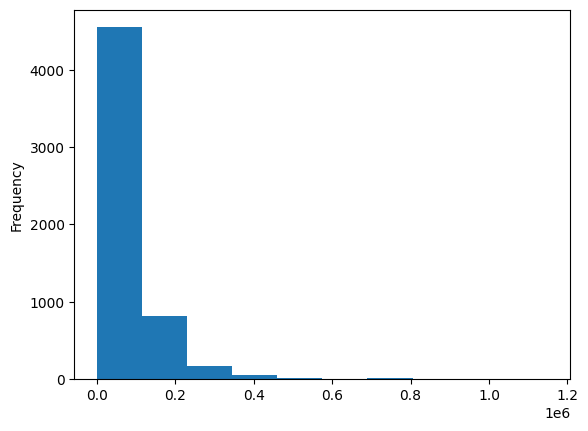

In [23]:
# Your code goes here
df['Price'].plot(kind='hist')

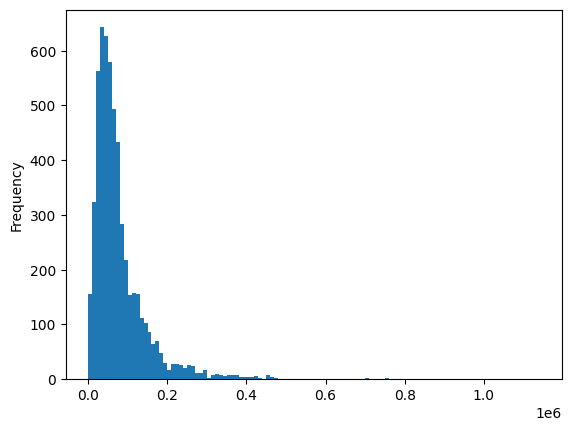

In [24]:
df['Price'].plot(kind='hist',bins=np.arange(0, df.Price.max(), 10000))
plt.show()

**مبروك 🎉**

جرب الآن إنك تلعب بقيمة عدد الأعمدة وشوف كيف حيغير شكل الرسمة

<h3 style="text-align: left;"> 🛣️ الممشى</h3>

<h3 style="text-align: left;"><b>تمرين:</b> ارسم توزيع الكيلومترات التي قطعتها السيارات. تذكر أن أكبر ممشى في البيانات هو ٢٠ مليون كيلومتر 📝</h3>

<AxesSubplot: ylabel='Frequency'>

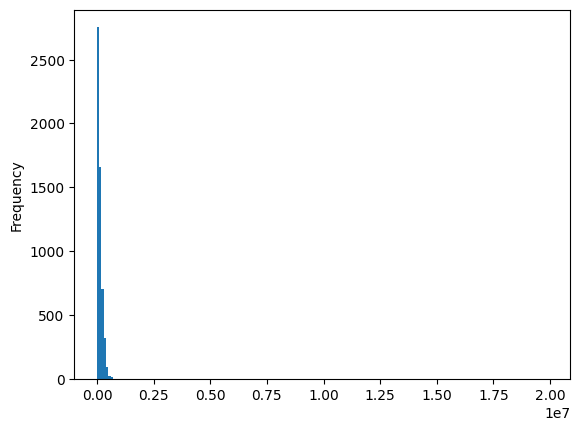

In [25]:
# Your code goes here
df['Mileage'].plot(kind='hist',bins=np.arange(0, df.Mileage.max(), 100000))

<h3 style="text-align: left;"><b>تمرين:</b> اكتشف ما إذا كان هناك قيم شاذة في عمود الممشى، وقم بإزالتها إن وجدت 📝</h3>

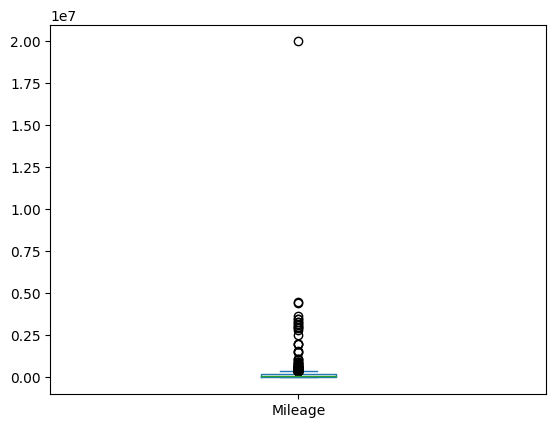

In [26]:
# Your code goes here
df['Mileage'].plot.box()
plt.show()

In [27]:
# Your code goes here
df = df[df['Mileage'] < 700000]
df

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
0,Chrysler,2018,Black,Full,Gas,103000,114000,C300
1,Nissan,2019,Silver,Standard,Gas,72418,27500,Sunny
2,Hyundai,2019,Grey,Standard,Gas,114154,43000,Elantra
3,Hyundai,2019,Silver,Semi Full,Gas,41912,59500,Elantra
4,Honda,2018,Navy,Full,Gas,39000,72000,Accord
...,...,...,...,...,...,...,...,...
5647,Kia,2006,Navy,Full,Gas,257000,15000,Sorento
5648,Audi,2015,Silver,Full,Gas,77000,75000,A6
5649,Chevrolet,2010,Silver,Full,Gas,150000,53000,Camaro
5650,Nissan,2011,Silver,Full,Gas,18500,22000,Altima


<AxesSubplot: ylabel='Frequency'>

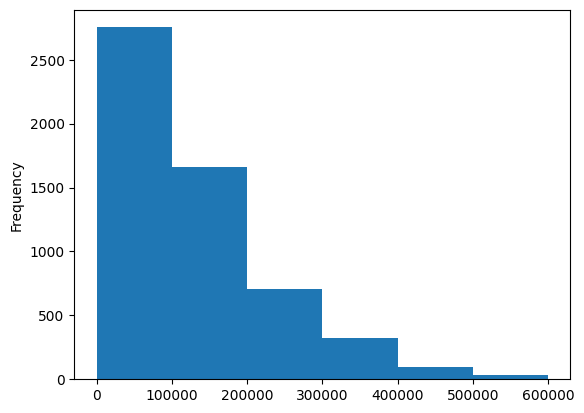

In [28]:
# Your code goes here
df['Mileage'].plot(kind='hist',bins=np.arange(0, df.Mileage.max(), 100000))

اللي قد يكون أكثر أهمية من توزيع الكيلومترات هو العلاقة بين ممشى سيارة وسعرها

عشان نصور هذه العلاقة، ممكن نستخدم مخطط اسمه مخطط الانتشار

The syntax is as follows:

```python
dataframe.plot(kind='scatter', x='ColumnName_1', y='ColumnName_2')
```

<h3 style="text-align: left;"><b>تمرين:</b> ارسم مخطط الانتشار بحيث تظهر توزيع كل من ميزتي الممشى والسعر والعلاقة بينهما📝</h3>

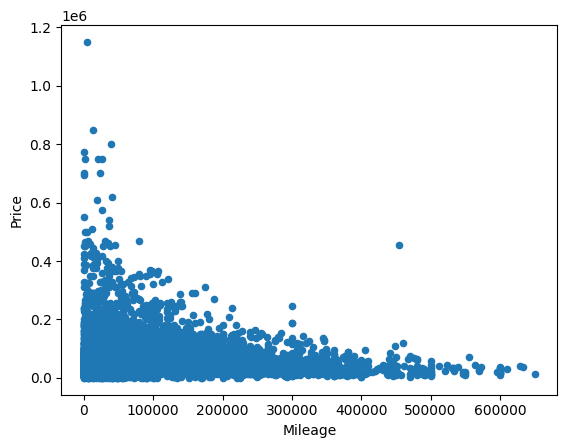

In [29]:
### Your code goes here
df.plot(kind='scatter',x='Mileage',y='Price')
plt.show()

## Remove outliers and ensure the scatterplot look good

<h3 style="text-align: left;"><b>سؤال :</b> كيف تفسر العلاقة بين الممشى والسعر؟ هل هي متوافقة مع كما كنت تتوقعه؟ ❓</h3>

<h3 style="text-align: left;"><b>اكتب إجابتك في هذه الخلية</b></h3>

<div style="text-align: left;">:الإجابة -</div>
هناك علاقة خطية سالبة بين الممشى والسعر، كلما قطعت السيارة كيلومترات أكثر، كلما قل سعرها.
{اكتب هنا}

<h3 style="text-align: left;"> 🎨 اللون الخارجي</h3>

<h3 style="text-align: left;"><b>تمرين:</b> اطبع كل الألوان المتفردة للسيارات المستعملة 📝</h3>

In [30]:
df.Color.unique()

array(['Black', 'Silver', 'Grey', 'Navy', 'White', 'Bronze',
       'Another Color', 'Golden', 'Brown', 'Blue', 'Red', 'Oily', 'Green',
       'Orange', 'Yellow'], dtype=object)

<h3 style="text-align: left;"><b>تمرين:</b> ارسم مخطط شريطي لألوان السيارات المستعملة📝</h3>

<AxesSubplot: >

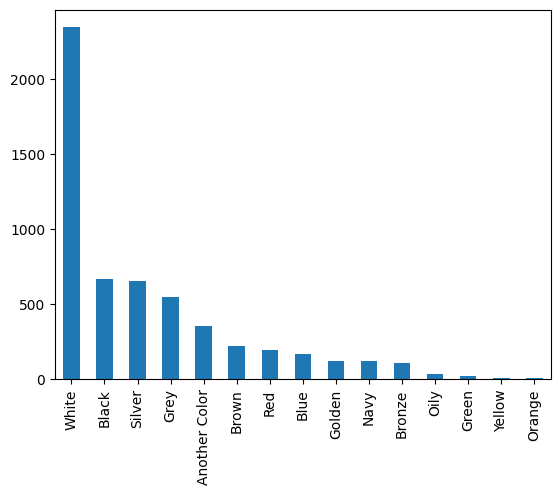

In [31]:
### Your code goes here
df['Color'].value_counts().plot(kind='bar')

<h2 style="text-align: left;"> 🤜🤛 الترابط</h2>

<h3 style="text-align: left;"> 🎛️ مصفوفة الترابط</h3>

Using Pandas it is very easy to calculate the correlations between all features:

```python
dataframe.corr()
```

We only want the correlation for features that are not categorical (remember that we consider binary features as categorical).   
In our dataset this corresponds to the features Age, KM, Weight, CC and HP.

Remember that we can select a subset of a DataFrame like this:
```python
dataframe[['column1', 'column2', 'column3']]
```

__Exercise:__ Calculate the correlation matrix for all features that are not categorical. Remember to include `Price` since we also want the correlations between the features and the sales price.

<h3 style="text-align: left;"><b>تمرين:</b> احسب مصفوفة الترابط لكل الميزات/المتغيرات الغير نوعية. تذكر أن تضمن في المصفوفة ميزة السعر، لأنه هو المتغير الذي نستهدفه ونريد حساب علاقته مع بقية المتغيرات 📝</h3>

In [32]:
df

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type
0,Chrysler,2018,Black,Full,Gas,103000,114000,C300
1,Nissan,2019,Silver,Standard,Gas,72418,27500,Sunny
2,Hyundai,2019,Grey,Standard,Gas,114154,43000,Elantra
3,Hyundai,2019,Silver,Semi Full,Gas,41912,59500,Elantra
4,Honda,2018,Navy,Full,Gas,39000,72000,Accord
...,...,...,...,...,...,...,...,...
5647,Kia,2006,Navy,Full,Gas,257000,15000,Sorento
5648,Audi,2015,Silver,Full,Gas,77000,75000,A6
5649,Chevrolet,2010,Silver,Full,Gas,150000,53000,Camaro
5650,Nissan,2011,Silver,Full,Gas,18500,22000,Altima


In [33]:
### Your code goes here
df.drop(columns=['Color','Fuel_Type']).corr()

/var/folders/86/6r0hhr297j965f3x7fr1_mdm0000gn/T/ipykernel_87047/1743864691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(columns=['Color','Fuel_Type']).corr()


,Year,Mileage,Price
Year,1.000000,-0.401532,0.305201
Mileage,-0.401532,1.000000,-0.271978
Price,0.305201,-0.271978,1.000000


**Using Seaborn to enhance our plotting/graphing**

We believe that the correlation matrix looks better in color so we plot it using a function called `heatmap` from the library `seaborn`. `seaborn` has some great "shortcuts" for providing insight into dataset statistics.

<AxesSubplot: >

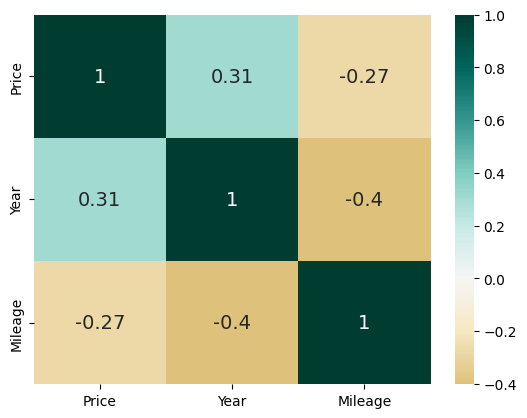

In [34]:
# Run this cell and a very nice matrix will hopefully appear
sns.heatmap(df[['Price','Year', 'Mileage']].corr(),annot=True, center=0, cmap='BrBG', annot_kws={"size": 14})

As we expected `Year` have the highest correlation with `Price`, followed by mileage (`KM`) and `Weight`. 

But, take a closer look at: 
* The correlation between Year and Mileage.   
* The correlation between Engine_Size and Mileage.

**ايش الشي الغريب في قيم العلاقات بين هذه المتغيرات؟**

<h3 style="text-align: left;"><b>تمرين:</b> ليش الترابط بين السنة والممشى كبير نسبيًا وسالب؟ لكن القيمة بين حجم المحرك والممشى صغيرة؟ هل عندك أية أفكار؟ 📝</h3>

<h3 style="text-align: left;"><b>اكتب إجابتك في هذه الخلية</b></h3>

<div style="text-align: left;">:الإجابة -</div>
الترابط بين سنة التصنيع والممشى كبير نسبيًا هو أمر طبيعي لأنه كل زاد عمر السيارة، كلما اُستهلكت بشكل أكبر. بينما هو صغير بين حجم المحرك والممشى لأنه ليس بينهم أي ترابط، قدرات السيارة ليس له علاقة مع المسافة التي ستقطعها على مدار فترة استخدامها

{اكتب هنا}

<h2 style="text-align: left;"> 💎 فوائد مُستنبطة</h2>

In the presentation we said that there are four goals in an EDA.   
To sum up the lab so far let's evaluate how well we met those goals:

* __Data Insight__:
    * We found the relationship between all features and Price
        * A key finding is that Year is the feature that by itself is most important
    * Your points goes here:
    * 
   
     
     
     
* __Data Summary__:
    * We calculated the correlation matrix
    * Your points goes here:
    * 
    



* __List of outliers__:
    * Possible outliers found in Mileage feature
    * Possible outliers found in price distribution
    * Your points goes here:
    * 
   
    
* __Dataset ready for modeling__:
    * We made a dataset free of inconcistencies
    * We removed missing values
    * We scaled the dataset

   


<h3 style="text-align: left;"><b>تمرين:</b> اكتب فوائد أخرى حصلت من التحليلات اللي قمت فيها فوق. المجال لك تحت إنك تكتشف البيانات بشكل أعمق وتطلع فوائد أخرى. متأكدين إنك بتشوف أشياء في البيانات حتكون رهيبة وجديدة علينا وممكن تشاركها معانا 📝</h3>

<h3 style="text-align: left;"><b>اكتب إجابتك في هذه الخلية</b></h3>
{اكتب هنا}

<h2 style="text-align: left;"> 🕸️ نمذجة البيانات</h2>

بكده نكون انتهينا من مرحلة اكتشاف البيانات، الآن حان وقت النمذجة. حناقش في هذا القسم النقاط التالية

* بناء نموذج انحدار خطي للتنبؤ بالأسعار
* ترميز البيانات
* تسوية الخصائص
* بناء نموذج غابة عشوائية بسيطة للتصنيف

هذا القسم حيكون أغلب الكود مكتوب بما إنه ما اتعمقنا فيه كثير في المحاضرة، اللي عليك هو أن تفهم النتائج وتقيمها 

In [35]:
df = read_ford_used_cars_dataset()
df.head()

,Make,Year,Color,Options,Fuel_Type,Mileage,Price,Type,Age,>=70k
0,Ford,2013,Black,Standard,gas,348000,46200.0,Expedition,105.775101,False
1,Ford,2018,White,Standard,Gas,82000,84750.0,Taurus,61.085510,True
2,Ford,2016,White,Full,Gas,104000,73400.0,Expedition,73.109955,True
3,Ford,2016,Red,Full,gas,93000,82900.0,Explorer,69.732066,True
4,Ford,2017,White,Full,Gas,34000,69425.0,Expedition,78.988104,False


### Linear Regression with one feature


****************
RMSE: 13451.575
****************


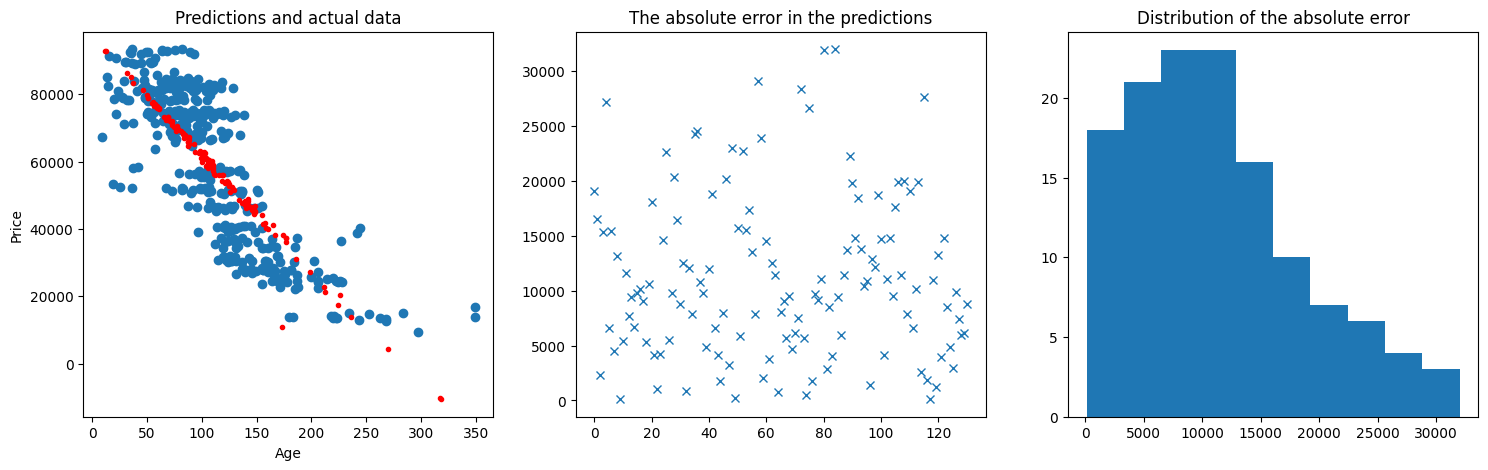

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Based on the scatter plots it seems like Age is the single most important feature
features = ['Age', 'Mileage']

# Create train and test data
X = df[features].values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize linear regressor model
# 'Train' the model
# Predict price based on data in test - set
# LinReg = RandomForestRegressor(n_estimators=10)
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(X_test)
abs_error = np.abs(y_pred - y_test)
print('\n****************\nRMSE: {:.3f}\n****************'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,5))
ax1.plot(X_train[:,0], y_train, 'o')
ax1.plot(X_test[:,0], y_pred, 'r.')
ax1.set_xlabel('Age')
ax1.set_ylabel('Price')
ax1.set_title('Predictions and actual data')
ax2.plot(np.arange(len(y_pred)), abs_error, 'x')
ax2.set_title('The absolute error in the predictions')
ax3.hist(abs_error)
ax3.set_title('Distribution of the absolute error')
plt.show()

<h3 style="text-align: left;"><b>تمرين:</b> حاول أن تحسن من أداء النموذج المطور أعلاه 📝</h3>


****************
RMSE: 0.000
****************

****************
RMSE: 13762.770
****************


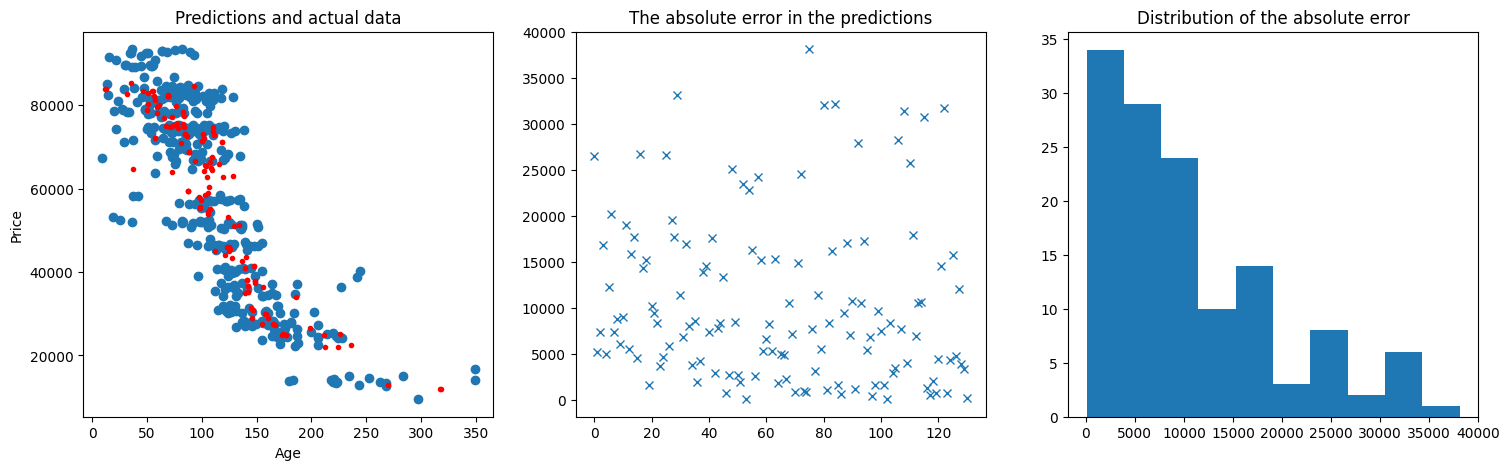

In [37]:
# Your code goes here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Based on the scatter plots it seems like Age is the single most important feature
features = ['Age']

# Create train and test data
X = df[features].values.reshape(-1,1)
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize linear regressor model
# 'Train' the model
# Predict price based on data in test - set
# LinReg = RandomForestRegressor(n_estimators=10)
LinReg = RandomForestRegressor(max_depth=10, n_estimators=50)
LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(X_test)
abs_error = np.abs(y_pred - y_test)
print('\n****************\nRMSE: {:.3f}\n****************'.format(np.sqrt(mean_squared_error(y_train, y_train))))

print('\n****************\nRMSE: {:.3f}\n****************'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,5))
ax1.plot(X_train[:,0], y_train, 'o')
ax1.plot(X_test[:,0], y_pred, 'r.')
ax1.set_xlabel('Age')
ax1.set_ylabel('Price')
ax1.set_title('Predictions and actual data')
ax2.plot(np.arange(len(y_pred)), abs_error, 'x')
ax2.set_title('The absolute error in the predictions')
ax3.hist(abs_error)
ax3.set_title('Distribution of the absolute error')
plt.show()

### One hot encoding and feature scaling

Until now we have not encoded the feature FuelType, but before we can use this feature as input to a model or a dimensionality reduction we need to apply one hot encoding. 
Running the next cell will store an encoded version of the dataset in a new dataframe called `df_ohe`.

In [38]:
df_ohe = df.drop(columns=['Type', 'Options', 'Color']).copy(deep=True)
df_ohe['Fuel_Type'] = df_ohe['Fuel_Type'].astype('category')
df_ohe = pd.get_dummies(df_ohe)

## TODO Remove options and type

__Exercise__: Print the first 15 rows of the encoded dataframe to see how FuelType is encoded

In [39]:
### Your code goes here
df_ohe.head(15)

,Year,Mileage,Price,Age,>=70k,Make_Ford,Fuel_Type_Diesel,Fuel_Type_Gas,Fuel_Type_gas
0,2013,348000,46200.0,105.775101,False,1,0,0,1
1,2018,82000,84750.0,61.085510,True,1,0,1,0
2,2016,104000,73400.0,73.109955,True,1,0,1,0
3,2016,93000,82900.0,69.732066,True,1,0,0,1
4,2017,34000,69425.0,78.988104,False,1,0,1,0
5,2018,100000,93050.0,63.875189,True,1,0,1,0
6,2015,103000,66650.0,104.909248,False,1,0,1,0
7,2016,136000,75250.0,56.913584,True,1,0,0,1
8,2012,352000,40150.0,140.714183,False,1,0,1,0
9,2016,112000,74000.0,101.785128,True,1,0,1,0


To be prepared for any model in the modelling phase, we also make a scaled dataset.    
The code below makes a new dataframe called `df_ohe_scaled` 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Year', 'Mileage']
df_ohe_scaled = df_ohe.dropna().copy()
df_ohe_scaled[columns_to_scale] = scaler.fit_transform(df_ohe.dropna()[columns_to_scale])

__Exercise__: Print the first 15 rows of the scaled dataframe to see that alle features are in the same range. 

In [41]:
### Your code goes here
df_ohe_scaled.head(15)

,Year,Mileage,Price,Age,>=70k,Make_Ford,Fuel_Type_Diesel,Fuel_Type_Gas,Fuel_Type_gas
0,-0.141832,0.819304,46200.0,105.775101,False,1,0,0,1
1,1.039350,-0.348871,84750.0,61.085510,True,1,0,1,0
2,0.566877,-0.252255,73400.0,73.109955,True,1,0,1,0
3,0.566877,-0.300563,82900.0,69.732066,True,1,0,0,1
4,0.803113,-0.559670,69425.0,78.988104,False,1,0,1,0
5,1.039350,-0.269822,93050.0,63.875189,True,1,0,1,0
6,0.330641,-0.256647,66650.0,104.909248,False,1,0,1,0
7,0.566877,-0.111723,75250.0,56.913584,True,1,0,0,1
8,-0.378069,0.836870,40150.0,140.714183,False,1,0,1,0
9,0.566877,-0.217122,74000.0,101.785128,True,1,0,1,0


### Classification 

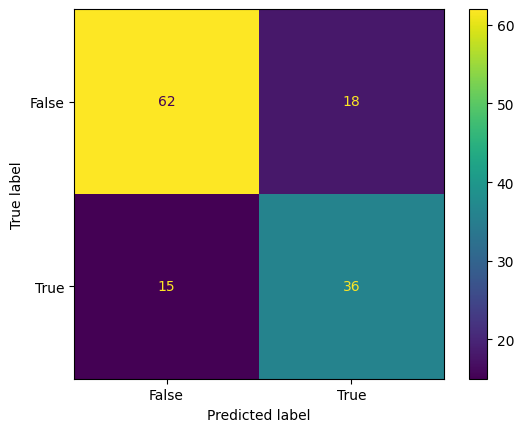

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Based on the scatter plots it seems like Age is the single most important feature
features = df_ohe.columns

# Create train and test data
X = df_ohe[['Mileage']].values
y = df_ohe['>=70k'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize linear regressor model
# 'Train' the model
# Predict price based on data in test - set
# LinReg = RandomForestRegressor(n_estimators=10)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

<br>
<br>
<br>
<br>
<div style="text-align: center; font-family: Arial; font-size: 2em;">كده نكون وصلنا لنهاية رحلة اكتشاف البيانات وتطوير نماذج تعلم الآلة، إن شاء الله كانت ممتعة واستفدوا منها الشي الكثير 🎉🎉🎉🎉</div>